# **Tutorial: Gradient Boosting**
### By Kostas Hatalis

**Prerequisite Notebooks:** *Decision Trees, Ensemble Learning, AdaBoost*

___

**Gradiant Boosting (GB)**, also commonly known as **Gradiant Boosting Machines (GBM)**, is a family of ensemble learning methods for classification or regression. GB was formally introduced in 1999 by Jerome Friedman [1]. GB produces a prediction model in the form of stagewise additive weak learners, such as decision trees like in AdaBoost. GB generalizes boosting by allowing optimization of an arbitrary differentiable loss function. An advantage of GB is that it typically outperforms other ensemble methods such as random forests. A disadvantage is that is much more computationally expensive.

The basic concept in AdaBoost was to train a series of weak learners on weighted versions of the training set observations, with each iteration placing more weight on poorly predicted observations. A final prediction is made from the weighted sum of all base learners. The first difference between GB and AdaBoost is that we don't apply any weighting to the training observations, but we do still calculate a weight for the output of each model to again make a weighted sum of all base learners for a final prediction. The second main difference is that the wieght applied to each model output is calculated based on a differentiable loss function (vs being calculated on training error rate). Each base model is trained using its predecessor's residual errors as labels.

In academia and industry, GB comes by many names depending on the type of weak learner used, regularization, etc. But they all typically refer to the same idea, the most common names are:
- Gradient Boosting Machines (GBM)
- Functional Gradient Boosting (FGB)
- Gradient Boosting Decision Trees (GBDT)
- Gradient Boosting Trees (GBT)
- Gradient Tree Boosting (GTB)
- Gradient Boosting Regression (GBR)
- Stochastic Gradient Boosting (SGB)
- Regularized Gradient Boosting (RGB)
- Boosted Regression Trees (BRT)
- Multiple Additive Regression Trees (MART)
- Generalized Boosting Models (GBM)

## **Intuition**
The idea in GB is to have $m=1,...,M$ weak learners. Like in other supervised learning algorithms, we start with a training set $(x_i,y_i)$ where $i=1,...,N$. The goal is to find an approximation $\hat{F}( x )$, that minimizes the expected value of some specified loss function $L ( y , F ( x ) )$, in the form of a weighted sum of weak learners $h_m ( x )$:

$$
\hat{F}( x ) = \sum_{m=1}^{M} \gamma_m h_m (x)
$$

GB builds the additive model $F(x)$ at each stage $m=1,...,M$ in a greedy fashion:

$$
F_{m} ( x ) = F_{m-1} ( x ) + \gamma_m h_m ( x )
$$

where the newly added model $h_m$ tries to minimizes the average value of the loss function $L$ on the training set, given the previous ensemble $F_{m-1}$:

$$
h_m = \underset{h}{\operatorname{argmin}} \sum_{i=1}^{N} L \left( y_i , F_{m-1} ( x_i ) + h ( x ) \right)
$$

Unfortunately, choosing the best function $h$ at each step for an arbitrary loss function $L$ is a computationally infeasible optimization problem. However, GB attempts to solve this minimization problem numerically via **steepest descent**: The steepest descent direction is the negative gradient of the loss function evaluated at the current model which can be calculated for any differentiable loss function:
$$
F_{m}(x)=F_{m-1}(x)-\gamma_{m} \sum_{i=1}^{N} \nabla_{F_{m-1}} L(y_{i},F_{m-1}(x_{i}))
$$

Where the step weight is chosen using line search:
$$
\gamma_{m} = \underset{\gamma }{\arg \min } \sum_{i=1}^{N} L \left( y_{i}, F_{m-1}(x_{i}) - \gamma \nabla_{F_{m-1}} L(y_{i},F_{m-1}(x_{i})) \right) \approx \underset{\gamma }{\arg \min } \sum_{i=1}^{N} L \left( y_{i}, F_{m-1}(x_{i}) + \gamma h_m(x_i) )  \right)
$$


## **Pseudocode Gradient Boosting Algorithm**

**Inputs:**
- training set  $\{(x_i, y_{i})\}_{i=1}^N$
- number of iterations $M$
- a differentiable loss function $L ( y , F ( x ) ) $
- choice of base weak learner $h(x)$

**Algorithm:**
> 1. Initialize model with a constant value such as mean of $y_i$ values or: 
$$
F_0(x) = \underset{\gamma}{\arg\min} \sum_{i=1}^{N} L(y_i, \gamma).
$$
> 2. For $m = 1$ to $M$:
>> 1. Compute the negative gradiant (so-called pseudo-residuals):
$$
r_{im} = -\nabla_{F_{m-1}} L(y_{i},F_{m-1}(x_{i}))=-\left[\frac{\partial L(y_i, F_{m-1}(x_i))}{\partial F_{m-1}(x_i)}\right] \quad \mbox{for } i=1,\ldots,N.
$$
>> 2. Fit a base learner (e.g. tree) $h_{m}(x)$ to pseudo-residuals, i.e. train it using the training set $\{(x_i, r_{im})\}_{i=1}^N$.
>> 3. Compute the step weight $\gamma_m$ using line search:
$$
\gamma_{m} = \underset{\gamma }{\arg \min } \sum_{i=1}^{N} L \left( y_{i}, F_{m-1}(x_{i}) + \gamma h_m(x_i) )  \right)
$$
>> 4. Update the model:
$$
F_{m}(x)=F_{{m-1}}(x)+\gamma _{m}h_{m}(x).
$$
> 3. Output $F_M(x)$.

## **Loss Functions**

The following are the most common loss functions used with GB.

*Regression*
- **Least Squares (Gaussian L2 loss)**: The natural choice for regression due to its superior computational properties. The initial model is given by the mean of the target values.
- **Least Absolute Deviation (Laplace L1 loss)**: A robust loss function for regression. The initial model is given by the median of the target values.
- **Huber**: Another robust loss function that combines least squares and least absolute deviation.
- **Quantile**: A loss function for quantile regression, $0 < \tau < 1$ specifies the quantile. This loss function can be used to create prediction intervals.

*Classification*
- **Binomial Deviance**: The negative binomial log-likelihood loss function for binary classification (provides probability estimates). The initial model is given by the log odds-ratio.
- **Multinomial Deviance**: The negative multinomial log-likelihood loss function for multi-class classification. It provides probability estimates. The initial model is given by the prior probability of each class. 
- **Exponential Loss**: The same loss function as AdaBoost, used for binary classification.

*Other families of response variable:*
- Loss functions for survival models
- Loss functions counts data
- Custom loss functions

## **GB Tree Constraints**

It is important that the weak learners have skill but remain weak. When using CARTS as the base learner, there are a number of ways that the trees can be constrained. A good general heuristic is that the more constrained tree creation is, the more trees you will need in the model, and the reverse, where less constrained individual trees, the fewer trees that will be required.

Below are some constraints that can be imposed on the construction of decision trees:
- Number of trees, generally adding more trees to the model can be very slow to overfit. The advice is to keep adding trees until no further improvement is observed.
- Tree depth, deeper trees are more complex trees and shorter trees are preferred. Generally, better results are seen with 4-8 levels.
- Number of nodes or number of leaves, like depth, this can constrain the size of the tree, but is not constrained to a symmetrical structure if other constraints are used.
- Number of observations per split imposes a minimum constraint on the amount of training data at a training node before a split can be considered
- Minimim improvement to loss is a constraint on the improvement of any split added to a tree.


## **Shrinkage**

A simple regularization strategy that scales the contribution of each weak learner by a factor

$$
F_{m}(x)=F_{{m-1}}(x)+\eta \gamma _{m}h_{m}(x)
$$

The parameter $\eta$ is also called the **learning rate** because it scales the step length of the gradient descent procedure.

The parameter $\eta$ strongly interacts with the parameter $M$, the number of weak learners to fit. Smaller values of $\eta$ require larger numbers of weak learners to maintain a constant training error. Empirical evidence suggests that small values of $\eta$ favor better test error (e.g. $\eta \geq 0.1$). GB with shrinkage and a least squares loss function for regression is illustrated below (from [2]):

<img src="images/gbm.PNG" width="600">


## **Stochastic Gradient Boosting**

Stochastic gradient boosting combines gradient boosting with bootstrap aggregation (bagging). At each iteration the base classifier is trained on a fraction subset (without replacement) of the available training data. The subset is typically 40% to 80% of the training set (a good value is 50%). By subsampling we can ensure further ensemble diversity. This has the effect of adding further variance to the ensemble of models. Another strategy to reduce the variance is by subsampling the features analogous to the random splits in random forests. Stochastic gradient boosting is illustrated below (from [2]):

<img src="images/stochastic_gb.PNG" width="600">


## **SKLEARN TUTORIAL GRADIENT BOOSTING**

In Sklearn the two main GB methods are `GradientBoostingClassifier` and `GradientBoostingRegressor`. Unlike `AdaBoostClassifier`, these methods do not have an argument for a `base_estimator`, and instead have built in decision trees for base models (and thus take all the same arguments as `DecisionTreeClassifier` too). Below are the main hyperparameters for GB:

`loss` is the loss function to be optimized. For classification the options are `deviance` (default) and `exponential`. For regression the options are `ls`, `lad`, `huber`, `quantile` (default = `ls`).

`learning_rate` is the learning rate that shrinks the contribution of each tree (default=0.1). Grid search [0.0001, 0.001, 0.01, 0.1, 1] or [2 to 10]/n_estimators.

`n_estimators` is the number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance (default=100). Grid search between 100 and 100 estimators.

`subsample` is the fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias. Grid search increments 10% to 100%.
___

Then you also have CART hyperparameters to tune. Sklearn comes with good defaults but here are some rules of thumb:

`max_features` is the number of features to consider when looking for the best split. Grid search [0.4, 0.6, 0.8, 1.0].

`max_depth`  is the maximum depth of the individual tree estimators. Grid search [4, 6, 8, 10].

Below is an example of how to run stochastic gradient boosting for classification in Sklearn.


In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets  import load_breast_cancer
from sklearn.model_selection import cross_val_score

# load data
data = load_breast_cancer()
X, y = data.data, data.target

# Instantiate a CART 'dt'
dt = DecisionTreeClassifier(random_state=1)

# Instantiate a stochastic GB Classifier 'ac'
gb = GradientBoostingClassifier(subsample = 0.5, random_state=1)

# Get accuracy score using CV for dt
scores = cross_val_score(dt, X, y, cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'Decision Tree'))

# Get accuracy score using CV for gb
scores = cross_val_score(gb, X, y, cv=5, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), 'Stochastic Gradient Boosting'))

Accuracy: 0.92 (+/- 0.02) [Decision Tree]
Accuracy: 0.97 (+/- 0.02) [Stochastic Gradient Boosting]


### **Sklearn GB Feature Importance**

Like Random Forests, GB allows for the evaluation of how features contributed to the final prediction (due to the use of decision trees). Individual decision trees intrinsically perform feature selection by selecting appropriate split points. This information can be used to measure the importance of each feature; the basic idea is: the more often a feature is used in the split points of a tree the more important that feature is. 

This notion of importance can be extended to decision tree ensembles by simply averaging the feature importance of each tree. By averaging the estimates of predictive ability over several randomized trees one can reduce the variance of such an estimate and use it for feature selection. This is known as the mean decrease in impurity, or MDI. This is implemented with the attribute `feature_importances_`.


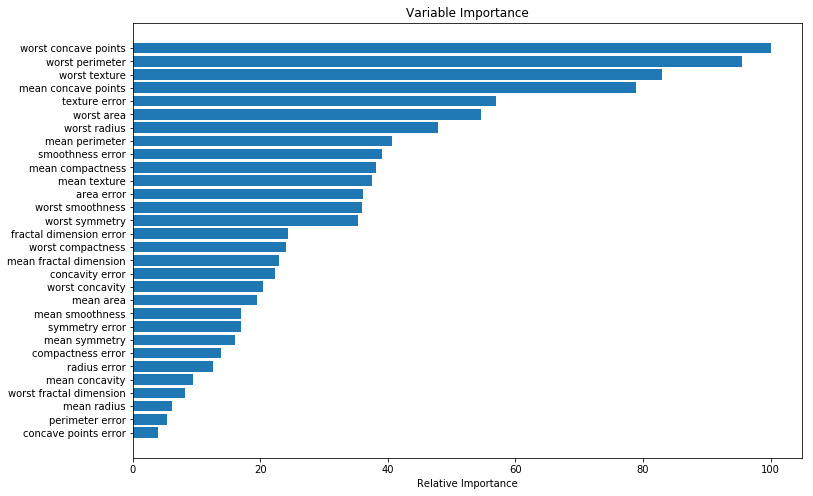

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# fit GB to whole dataset and get feature importanct
clf = GradientBoostingClassifier(subsample = 0.5, random_state=1).fit(X, y)
feature_importance = clf.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# plot feature importance
plt.figure(figsize=(12,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## **XGBoost vs. LightGBM vs. CatBoost**



___
## **References**

[1] Friedman, J. H. (February 1999). "Greedy Function Approximation: A Gradient Boosting Machine"

[2] https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/

[3] https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting

[4] https://en.wikipedia.org/wiki/Gradient_boosting

[5] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3885826/

[6] https://www.youtube.com/watch?v=3CC4N4z3GJc&t=161s

[7] https://www.frontiersin.org/articles/10.3389/fnbot.2013.00021/full

[8] https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/

[9] 